# Student Performance Data Cleaning  

## Setup & Load
Import libraries, set CSV path, and load dataset into a DataFrame.

In [1226]:
csv_path = "StudentPerformanceFactors.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1227]:
df = pd.read_csv(csv_path)

## Quick Look
Check shape, first rows, dtypes, and summary stats.

In [1228]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (6607, 20)

First 5 Rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [1229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [1230]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,NaN,NaN,NaN,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,NaN,NaN,NaN,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Parental_Involvement,6607,3,Medium,3362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Access_to_Resources,6607,3,Medium,3319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extracurricular_Activities,6607,2,Yes,3938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep_Hours,6607.0,NaN,NaN,NaN,7.02906,1.46812,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,NaN,NaN,NaN,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Motivation_Level,6607,3,Medium,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internet_Access,6607,2,Yes,6108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tutoring_Sessions,6607.0,NaN,NaN,NaN,1.493719,1.23057,0.0,1.0,1.0,2.0,8.0


## Missing Values
- Summarize numeric vs categorical cols and missingness.
- Drop rows with missing key categoricals.
- Check and optionally drop duplicate rows.
- Backup dataset

In [1231]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "Unique": df.nunique(),
    "Missing": df.isna().sum(),
    "Missing %": (df.isna().mean()*100).round(2),
}).sort_index()

display(summary)

display(summary[summary["Missing"] > 0])

print(f"\nNumerical ({len(num_cols)}): {num_cols}")
print(f"Categorical ({len(cat_cols)}): {cat_cols}")


,dtype,Unique,Missing,Missing %
Access_to_Resources,object,3,0,0.00
Attendance,int64,41,0,0.00
Distance_from_Home,object,3,67,1.01
Exam_Score,int64,45,0,0.00
Extracurricular_Activities,object,2,0,0.00
Family_Income,object,3,0,0.00
Gender,object,2,0,0.00
Hours_Studied,int64,41,0,0.00
Internet_Access,object,2,0,0.00
Learning_Disabilities,object,2,0,0.00


,dtype,Unique,Missing,Missing %
Distance_from_Home,object,3,67,1.01
Parental_Education_Level,object,3,90,1.36
Teacher_Quality,object,3,78,1.18



Numerical (7): ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical (13): ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [1232]:
missing_categorical_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
df = df.dropna(subset=missing_categorical_cols)

In [1233]:
df.isna().sum().sum()

np.int64(0)

In [1234]:
# Check and (optionally) drop duplicate rows.

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
# df = df.drop_duplicates()

Number of duplicate rows: 0


In [1235]:
# Copy dataset before filtering.
df_before = df.copy()

## Outlier Handling & Final Check
Backup dataset, define IQR function, filter outliers in numeric columns, report removed rows, and compare shape before/after cleaning.



In [1236]:
def iqr_bounds(series, k=1.5):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

In [1237]:
numeric_cols_for_filtering  = {'Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score'} 

# Build a single mask for all columns
mask = np.ones(len(df), dtype=bool)

for col in numeric_cols_for_filtering:
    lower, upper = iqr_bounds(df[col])
    mask &= df[col].between(lower, upper)

# Apply mask
df = df[mask].copy()

In [1238]:
per_col = {}
for col in numeric_cols_for_filtering:
    lower, upper = iqr_bounds(df_before[col])
    out = ~df_before[col].between(lower, upper)
    per_col[col] = {
        "lower": float(lower),
        "upper": float(upper),
        "n_outliers": int(out.sum())
    }

for c, info in per_col.items():
    print(f"{c}: lower={info['lower']:.3f}, upper={info['upper']:.3f}, outliers={info['n_outliers']}")

Attendance: lower=40.000, upper=120.000, outliers=0
Physical_Activity: lower=-1.000, upper=7.000, outliers=0
Hours_Studied: lower=4.000, upper=36.000, outliers=40
Exam_Score: lower=59.000, upper=75.000, outliers=103
Sleep_Hours: lower=3.000, upper=11.000, outliers=0
Previous_Scores: lower=25.500, upper=125.500, outliers=0
Tutoring_Sessions: lower=-0.500, upper=3.500, outliers=423


In [1239]:
print("IQR Outlier Removal Report")
print(f"Shape before: {df_before.shape}")
print(f"Shape after : {df.shape}")
print(f"Rows removed: {df_before.shape[0] - df.shape[0]}")

IQR Outlier Removal Report
Shape before: (6378, 20)
Shape after : (5836, 20)
Rows removed: 542


# (EDA) & Visualization  

## Outlier Visualization
Compare distributions before/after outlier removal with histograms and boxplots.

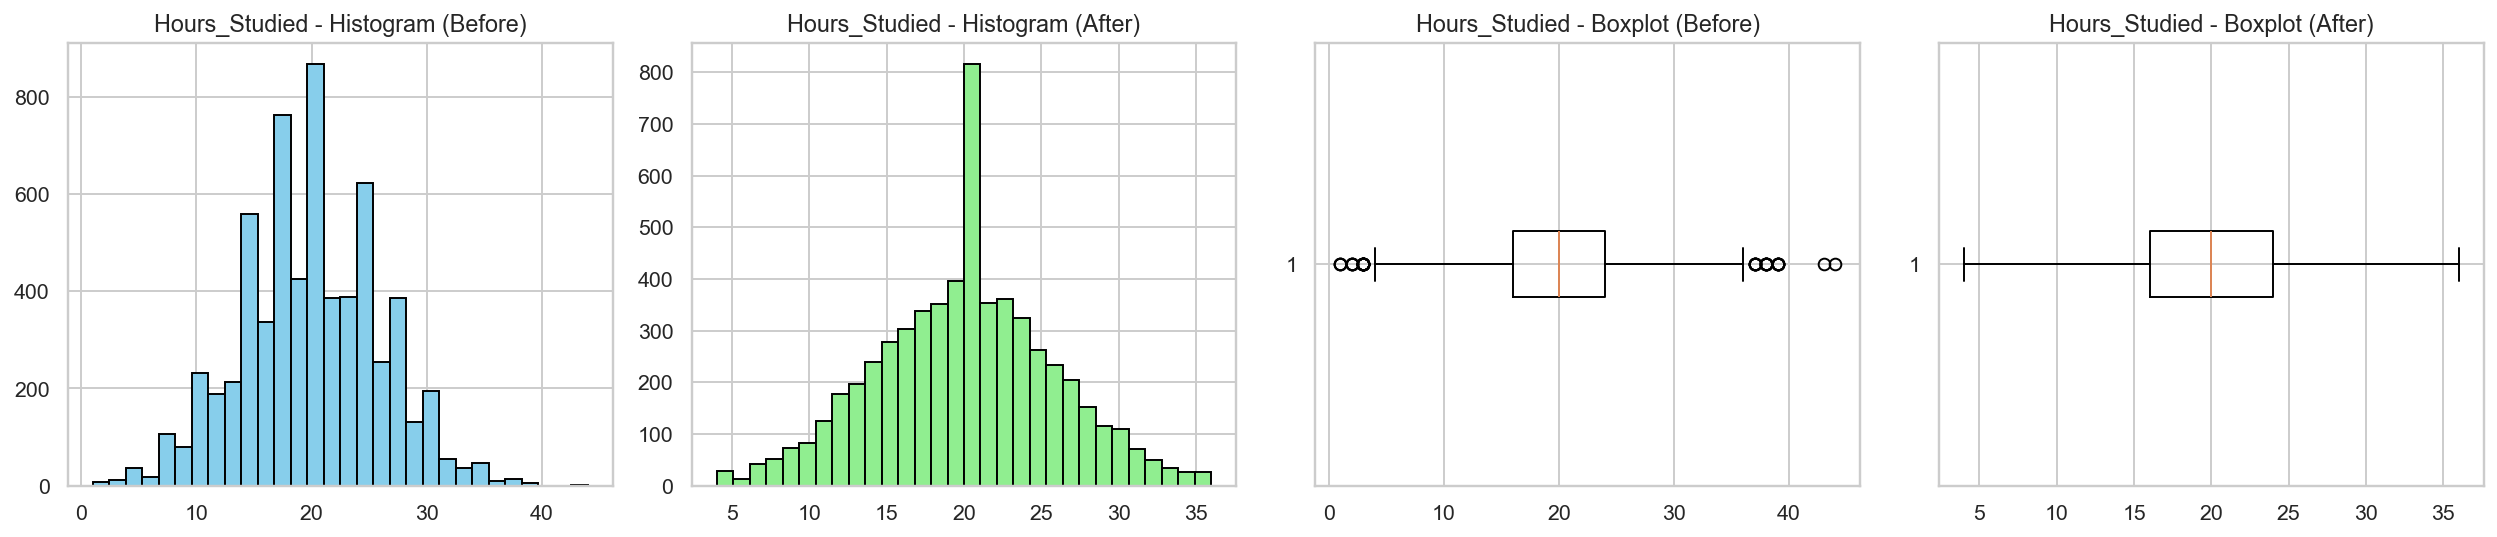

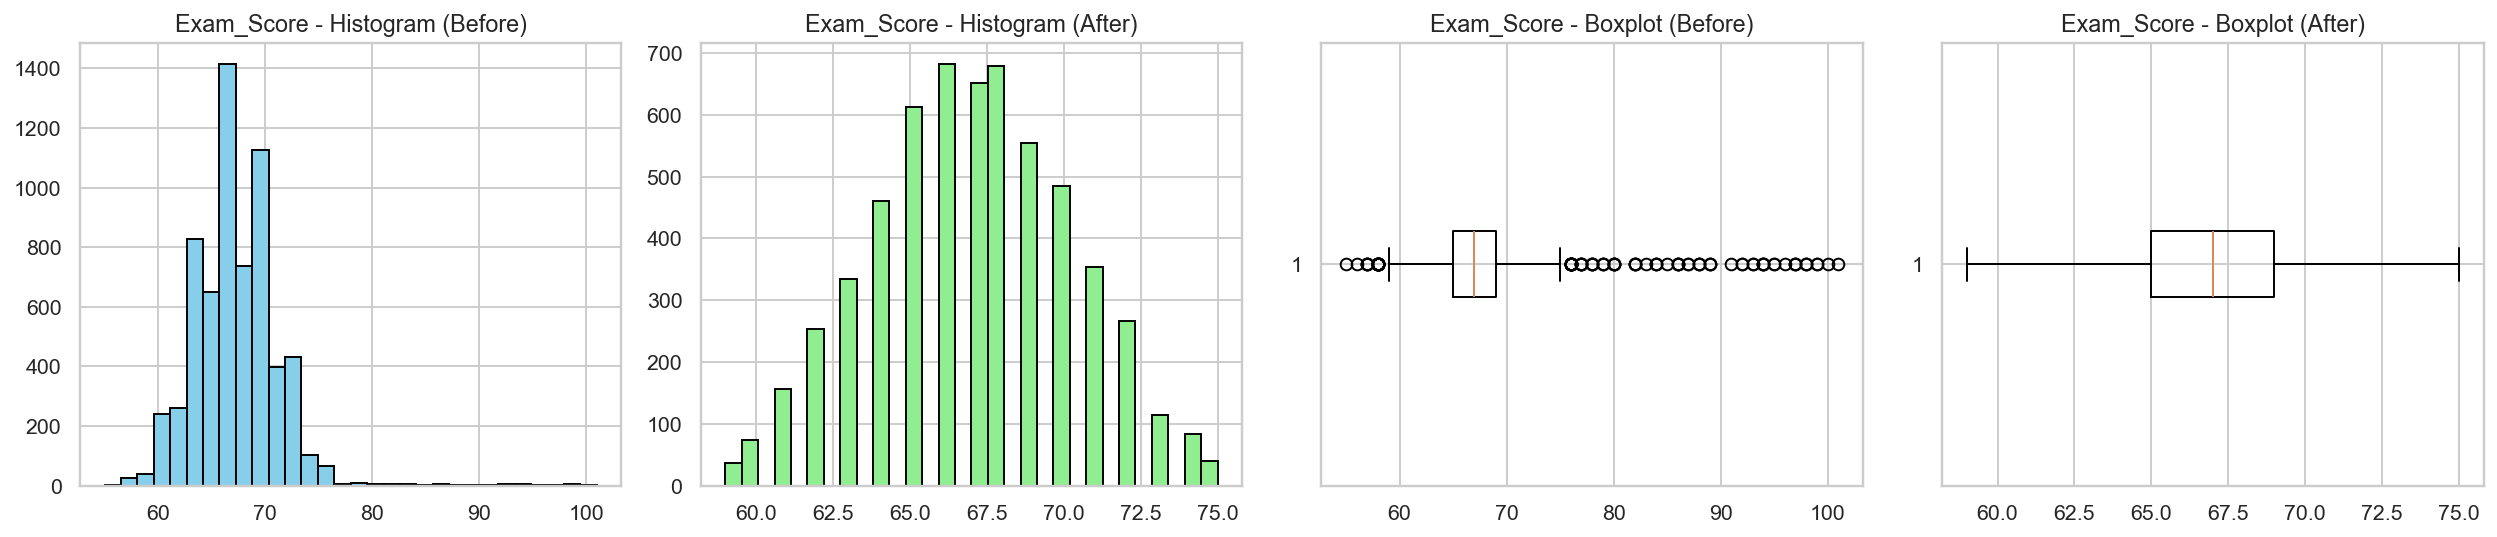

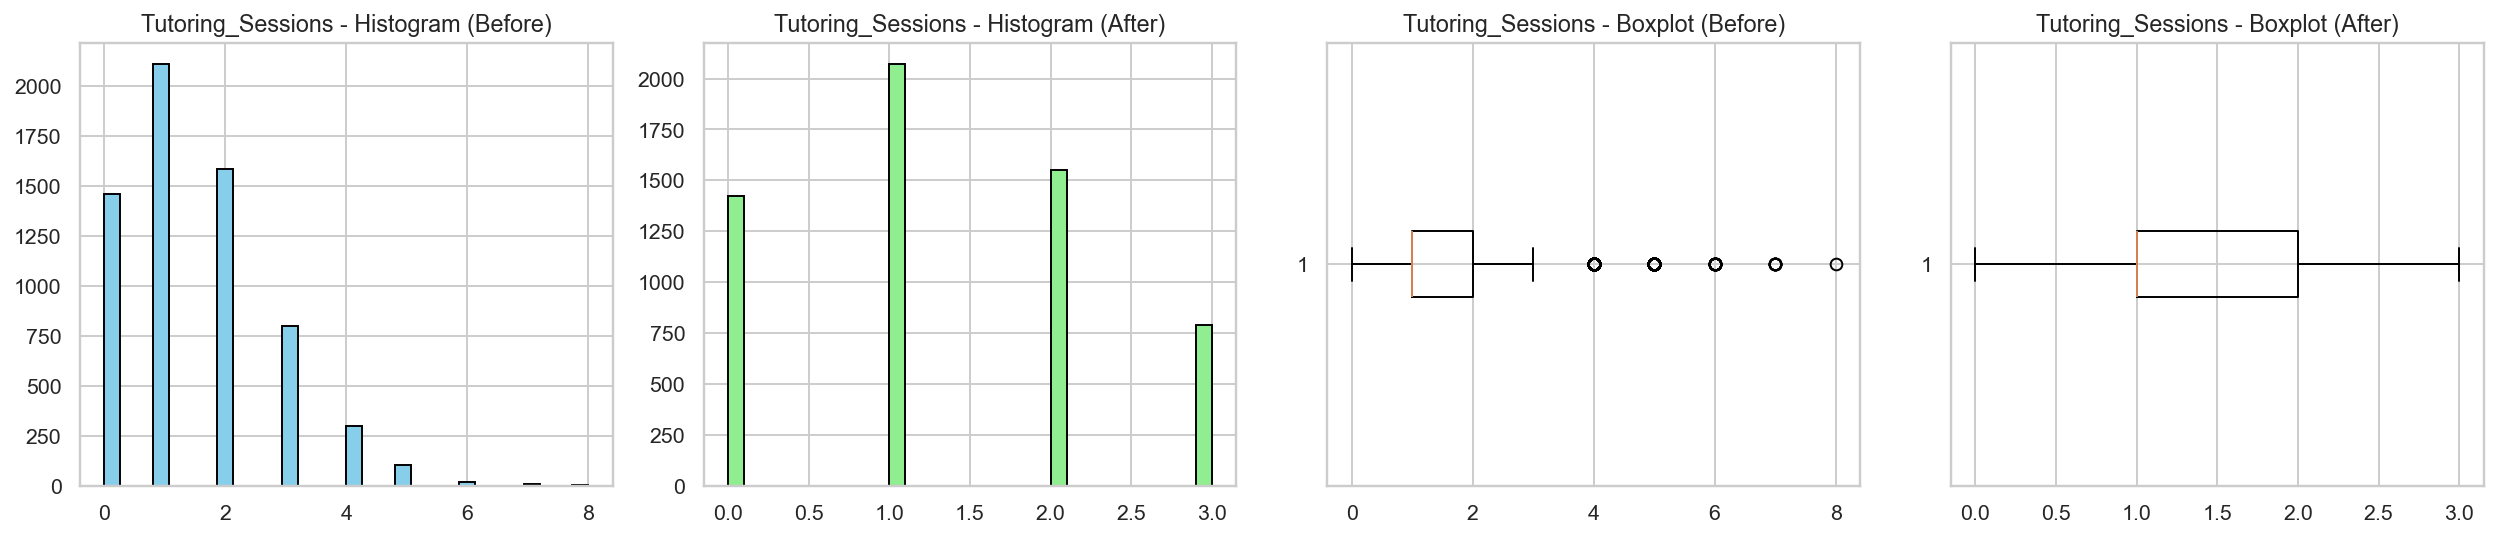

In [1240]:
changed_cols = [col for col, info in per_col.items() if info['n_outliers'] > 0]

# Plot comparison
for col in changed_cols:
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    
    # Histogram Before & After
    axes[0].hist(df_before[col], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{col} - Histogram (Before)')

    axes[1].hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'{col} - Histogram (After)')
    
    # Boxplot Before & After
    axes[2].boxplot(df_before[col], vert=False)
    axes[2].set_title(f'{col} - Boxplot (Before)')

    axes[3].boxplot(df[col], vert=False)
    axes[3].set_title(f'{col} - Boxplot (After)')
    
    plt.tight_layout()
    plt.show()


## Numeric Distributions
Plot histograms with KDE for all numeric columns.

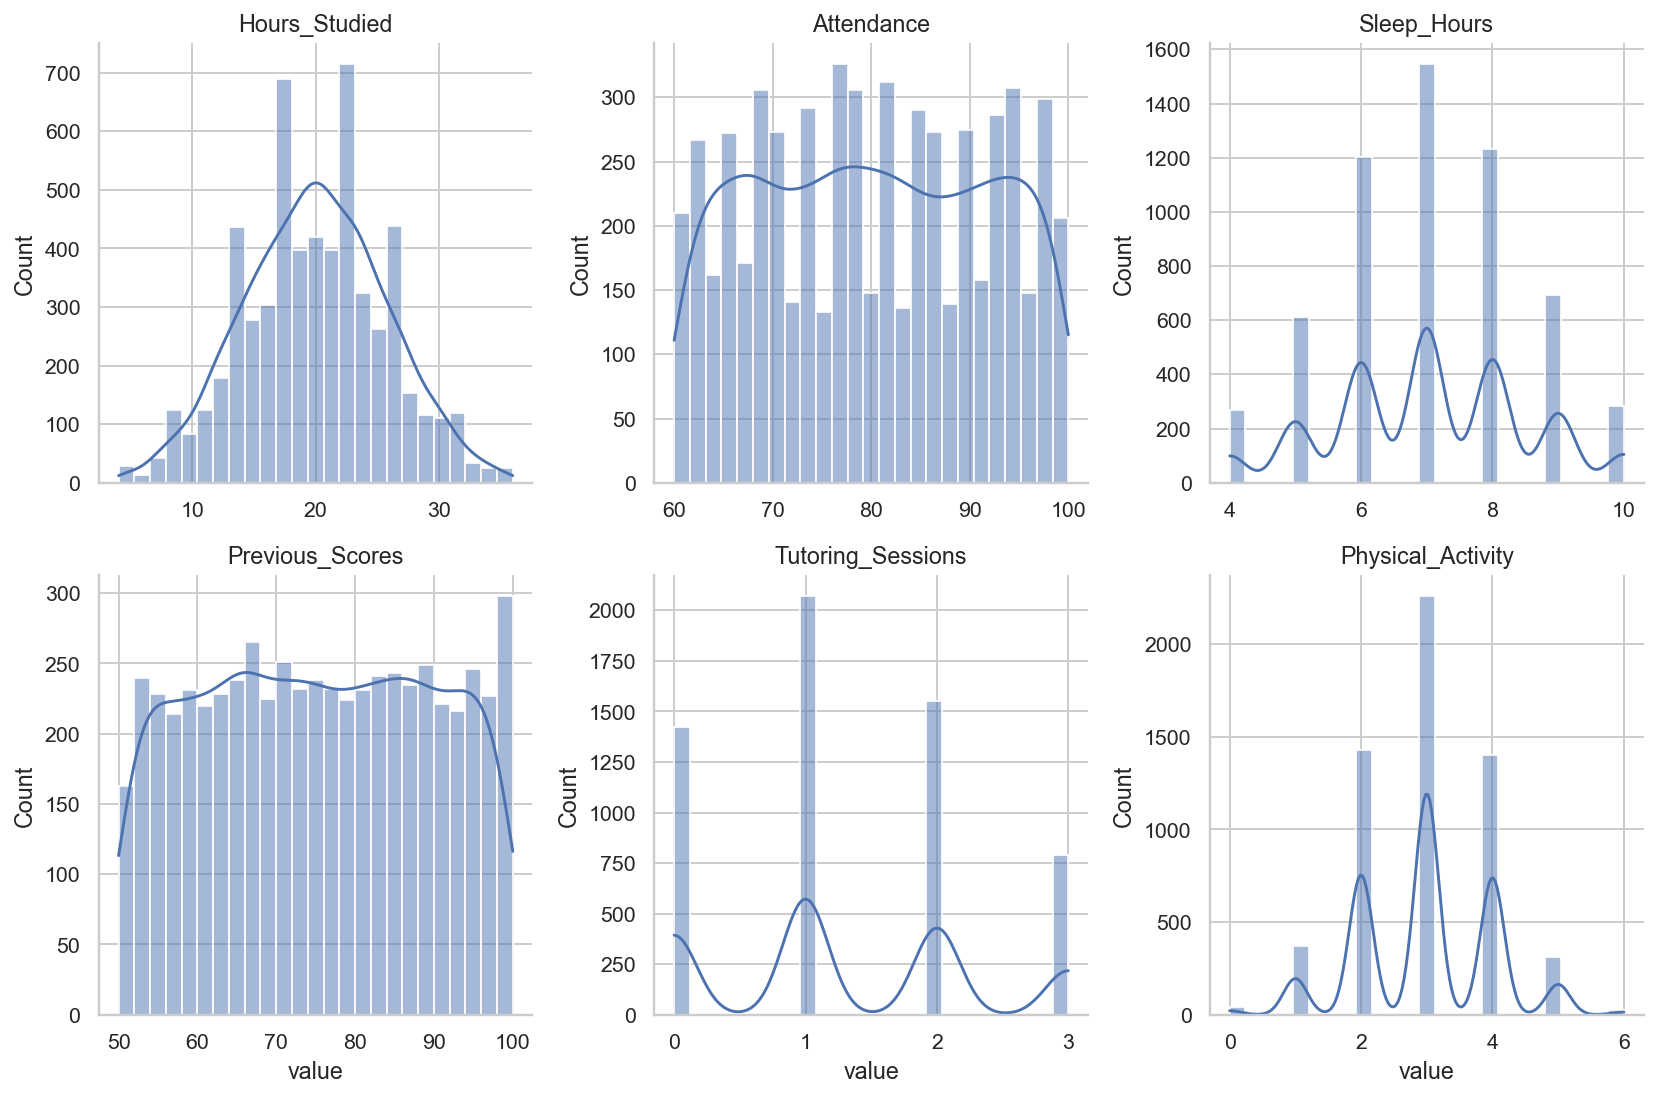

In [1241]:
# Remove target from numeric columns
num_cols_no_target = [col for col in num_cols if col != "Exam_Score"]

sns.set_style("whitegrid")

g = sns.FacetGrid(
    df[num_cols_no_target].melt(value_vars=num_cols_no_target, var_name="variable", value_name="value"),
    col="variable", col_wrap=3,
    sharex=False, sharey=False,
    height=4
)
g.map_dataframe(sns.histplot, x="value", kde=True, bins=25)
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()


## Target Distribution
Visualize exam score distribution with mean and median markers.

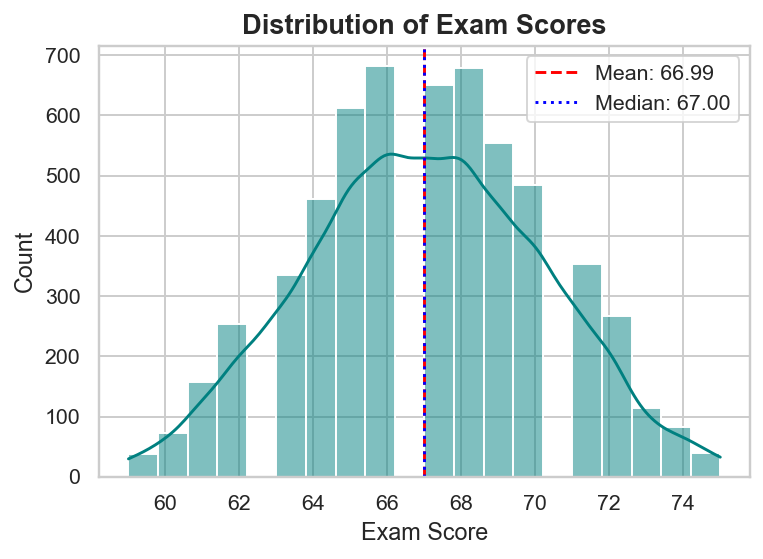

In [1242]:
plt.figure(figsize=(6,4))
sns.histplot(df['Exam_Score'], kde=True, bins=20, color='teal')

mean_val = df['Exam_Score'].mean()
median_val = df['Exam_Score'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle=':', linewidth=1.5, label=f'Median: {median_val:.2f}')

plt.title("Distribution of Exam Scores", fontsize=14, fontweight='bold')
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.legend()
plt.show()



## Categorical Features
Plot pie charts and count plots for categorical variables.

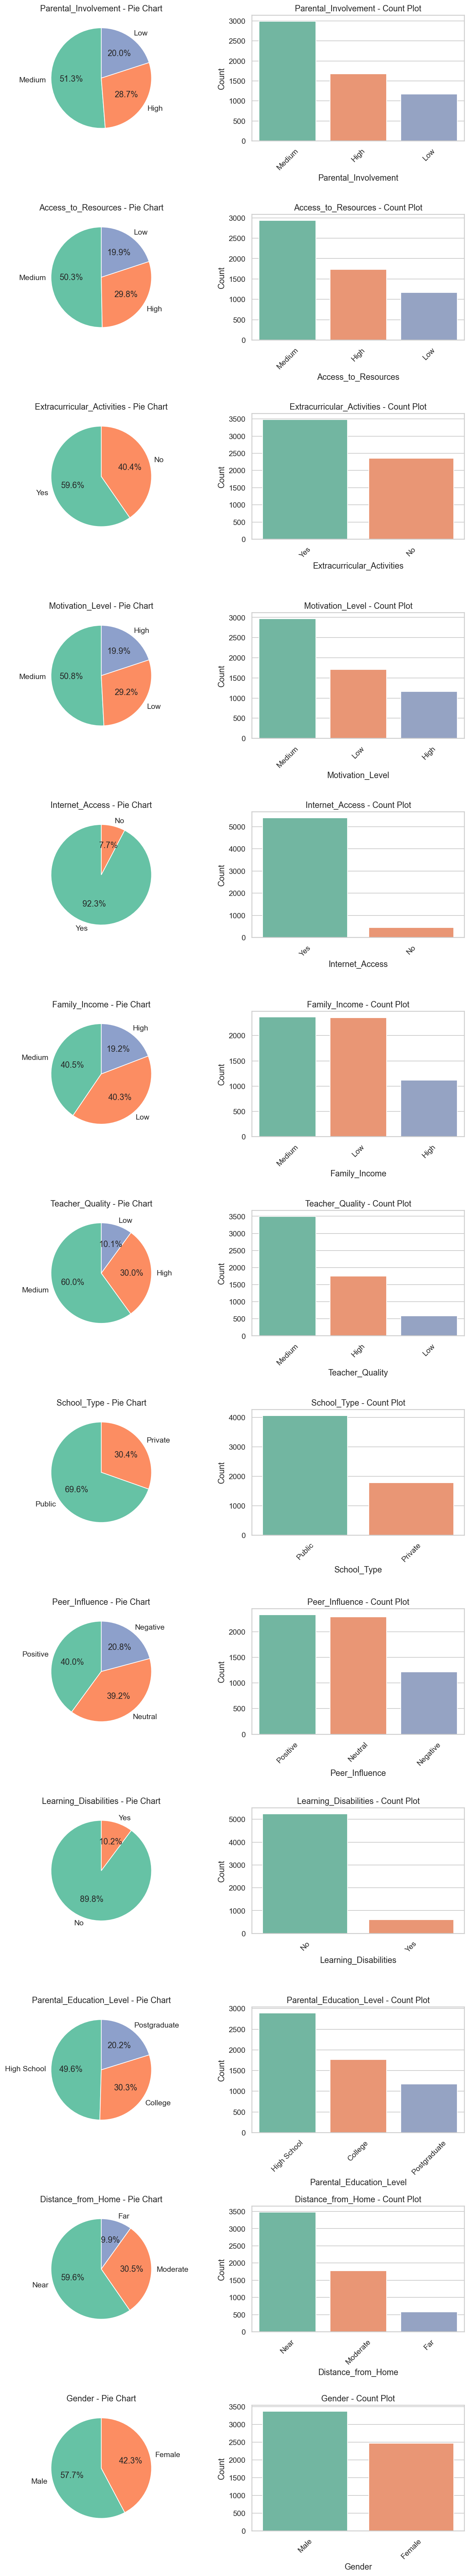

In [ ]:
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(10, 4*len(cat_cols)))

for i, col in enumerate(cat_cols):
    vc = df[col].value_counts()
    labels = vc.index
    colors = sns.color_palette("Set2", len(vc))

# Pie chart
    axes[i, 0].pie(vc, labels=labels, autopct='%1.1f%%',startangle=90, colors=colors)
    axes[i, 0].set_title(f"{col} - Pie Chart")

# Count plot
    sns.barplot(x=labels, y=vc.values, ax=axes[i, 1], palette=colors)
    axes[i, 1].set_title(f"{col} - Count Plot")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## Feature Encoding
- Apply **Ordinal Encoding** for ordered categorical features.  
- Apply **One-Hot Encoding** for nominal categorical features.  
- Preview encoded features and dataset sample.

In [1244]:
from sklearn.preprocessing import OrdinalEncoder

ordered_features  = ['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality','Parental_Education_Level','Distance_from_Home']
ordered_categories = [
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['High School', 'College', 'Postgraduate'],
    ['Near', 'Moderate', 'Far']
]

encoder = OrdinalEncoder(categories=ordered_categories)
df[ordered_features] = encoder.fit_transform(df[ordered_features])

nominal_features = ['Extracurricular_Activities','Internet_Access','School_Type','Peer_Influence','Learning_Disabilities','Gender']
df = pd.get_dummies(df, columns=nominal_features, drop_first=True, dtype=int)

In [1245]:
df[ordered_features].astype(int).head()

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,0,2,0,0,1,0,0
1,0,1,0,1,1,1,1
2,1,1,1,1,1,2,0
3,0,1,1,1,1,0,1
4,1,1,1,1,2,1,0


In [1246]:
df.sample()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
5820,20,62,1.0,1.0,4,98,2.0,1,2.0,0.0,...,0.0,0.0,64,0,1,1,0,0,0,1


## Correlation with Exam_Score
Filter and plot features with |correlation| ≥ 0.15.


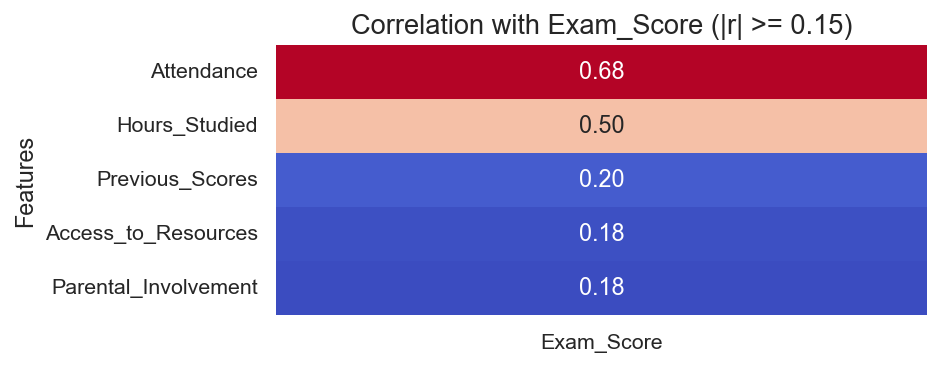

In [1247]:
target = "Exam_Score"
threshold = 0.15

corr = df.corr()
corr_target = corr[target].drop(target)
# filter strong correlations
strong_corr = corr_target[abs(corr_target) >= threshold].sort_values(ascending=False)

# plot heatmap
plt.figure(figsize=(6, len(strong_corr) / 2))
sns.heatmap(strong_corr.to_frame(), annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title(f"Correlation with {target} (|r| >= {threshold})", fontsize=14)
plt.ylabel("Features")
plt.show()

## Mutual Information
Compute MI scores and show top 10 features.


Top features by Mutual Information:


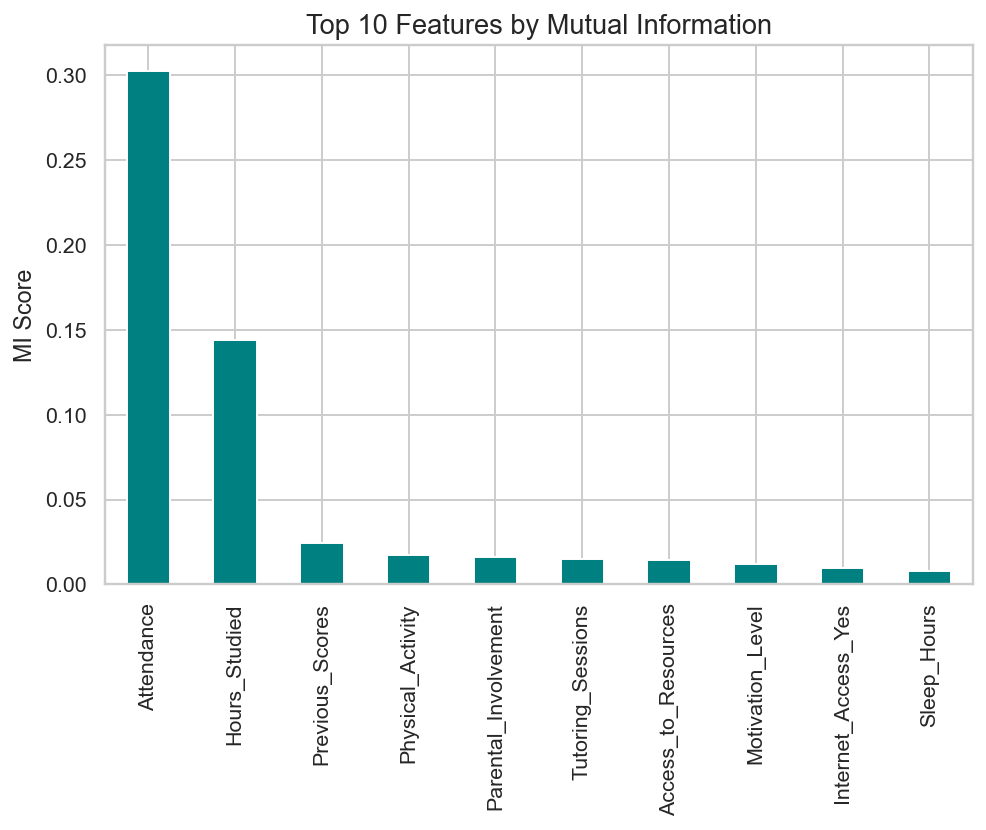

In [1248]:
from sklearn.feature_selection import mutual_info_regression

# features and target
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# calculate mutual information
mi = mutual_info_regression(X, y, random_state=42)

# store in dataframe
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Top features by Mutual Information:")
# plot
plt.figure(figsize=(8, 5))
mi_scores.head(10).plot.bar(color="teal")
plt.title("Top 10 Features by Mutual Information", fontsize=14)
plt.ylabel("MI Score")
plt.show()


# Modeling

## Train/Test Split
We split the dataset into training and testing sets (80/20 ratio).  


In [1249]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)

Train shape: (4668, 20) (4668,)
Test shape : (1168, 20) (1168,)


## Functions

### Visualization Function
Plot Actual vs Predicted and Residuals distribution for any model.


In [1250]:
def plot_predictions(y_true, y_pred, name="Model"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Actual vs Predicted
    ax[0].scatter(y_true, y_pred, alpha=0.6)
    lo, hi = y_true.min(), y_true.max()
    ax[0].plot([lo, hi], [lo, hi], "r--")
    ax[0].set(title=f"Actual vs Predicted ({name})", xlabel="Actual", ylabel="Predicted")

    # Residuals
    sns.histplot(y_true - y_pred, bins=30, kde=True, ax=ax[1], color="teal")
    ax[1].set(title=f"Residuals ({name})", xlabel="Residuals")
    plt.tight_layout(); plt.show()

### Evaluation Function
Return MAE, RMSE, and R² as a DataFrame for easy model comparison.


In [1251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.DataFrame({"Model":[name], "MAE":[mae], "RMSE":[rmse], "R²":[r2]})

### Permutation Importance Function
Compute and plot top-N important features for a trained model.


In [1252]:
from sklearn.inspection import permutation_importance

def permutation_importance_plot(model, X, y, model_name="Model", top_n=10):
    perm = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    scores = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
    scores.head(top_n).plot.bar(color="orange", figsize=(8,5))
    plt.title(f"Top {top_n} Features ({model_name})")
    plt.ylabel("Importance")
    plt.show()
    return scores

## Models

### Linear Regression  
Baseline model, assumes linear relation between features and target.  

,Model,MAE,RMSE,R²
0,Linear,0.264,0.311,0.99


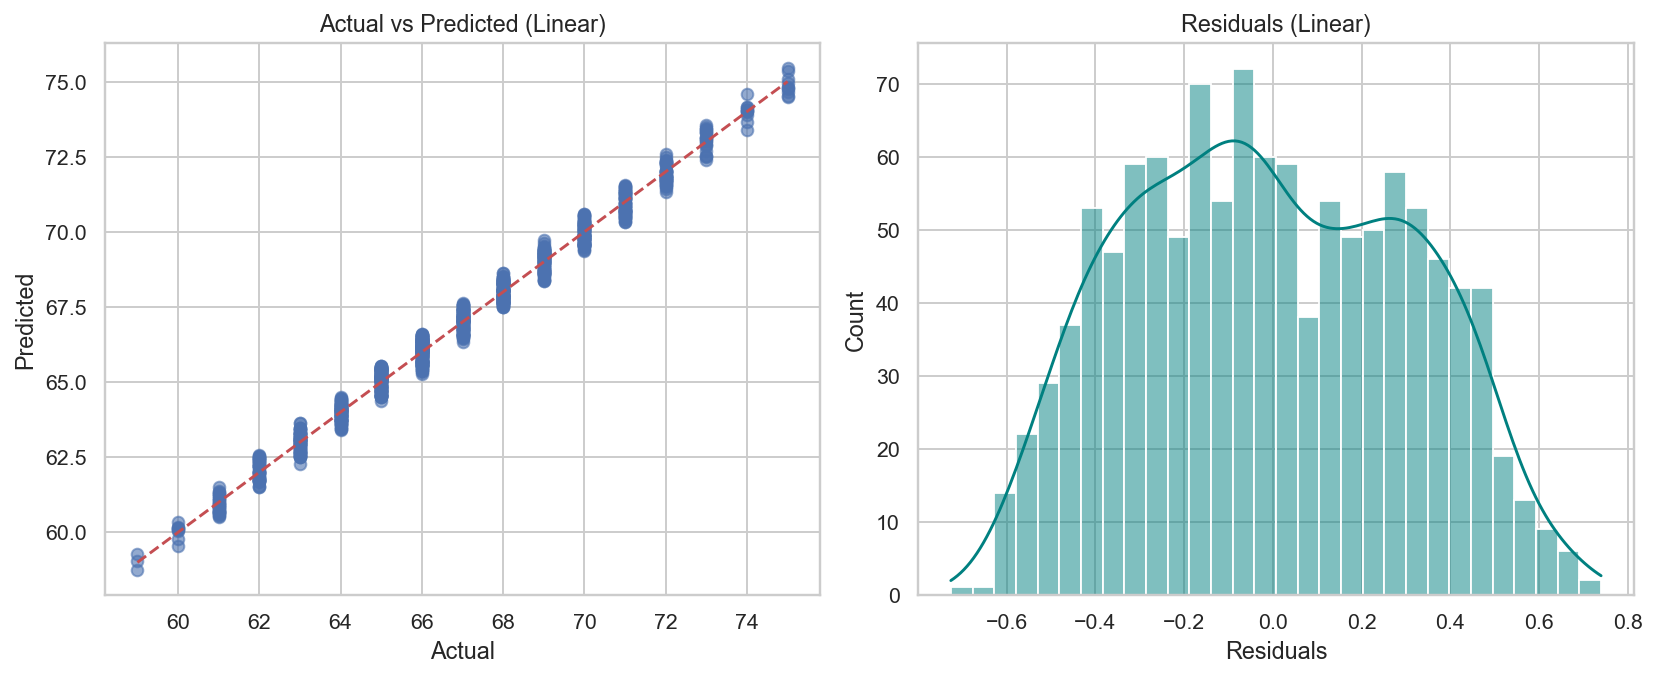

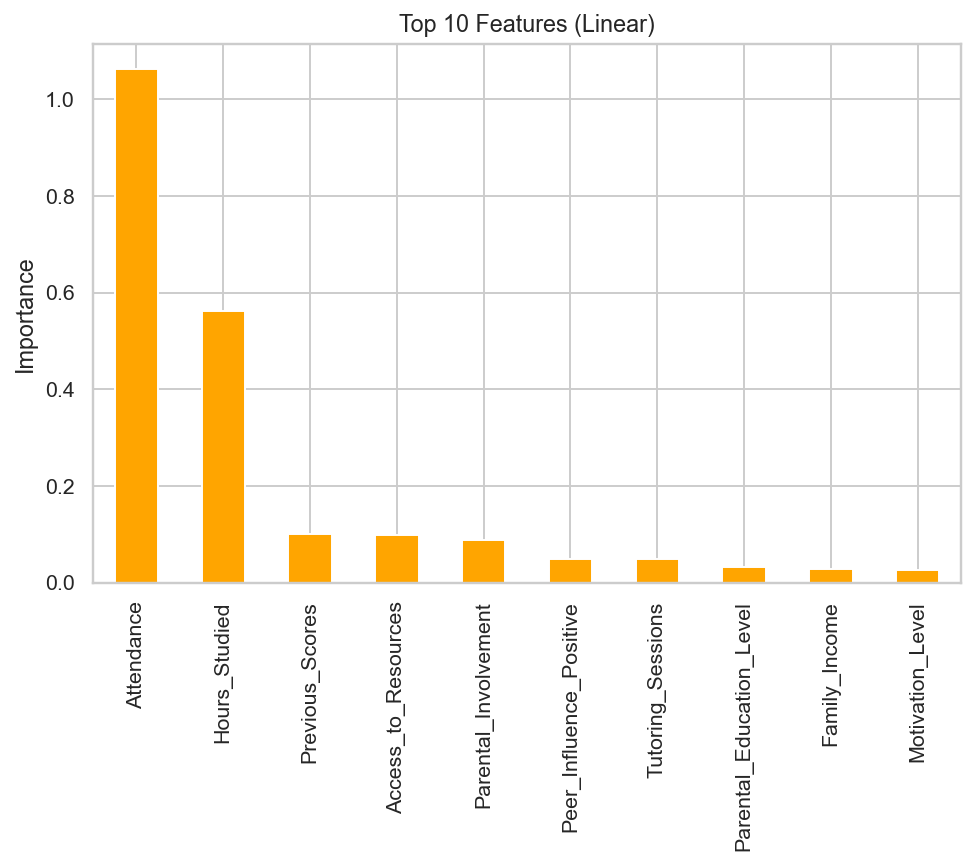

In [1253]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# train
lin = LinearRegression()
lin.fit(X_train, y_train)

# predict
y_pred_lin = lin.predict(X_test)

# evaluate
lin_results = evaluate_model(y_test, y_pred_lin, "Linear")
display(lin_results.round(3))

# visualize
plot_predictions(y_test, y_pred_lin, "Linear")

# permutation importance
perm_lin = permutation_importance_plot(lin, X_test, y_test, top_n=10, model_name="Linear")


### Ridge Regression  
Adds L2 regularization; performance same as Linear.  

,Model,MAE,RMSE,R²
0,Ridge,0.264,0.311,0.99


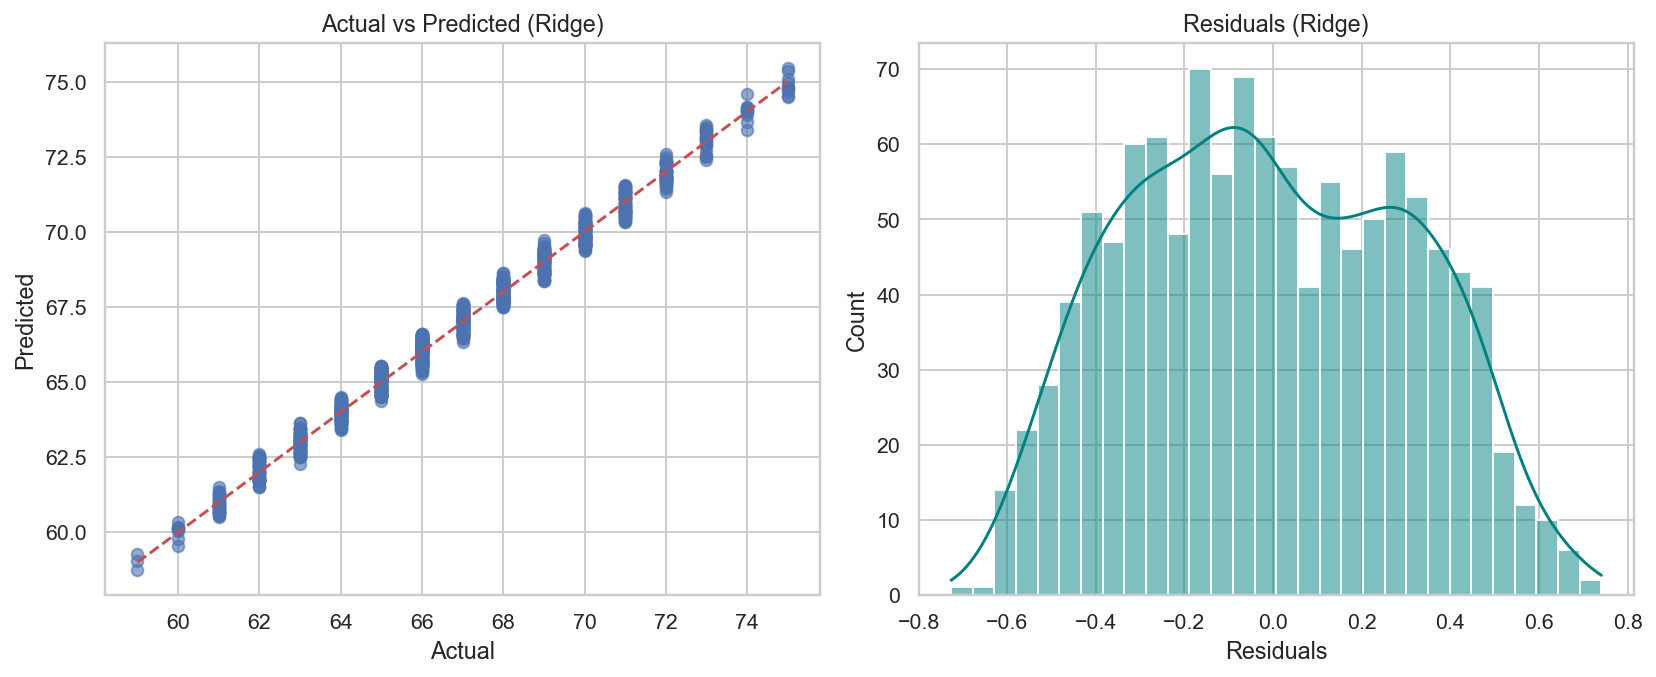

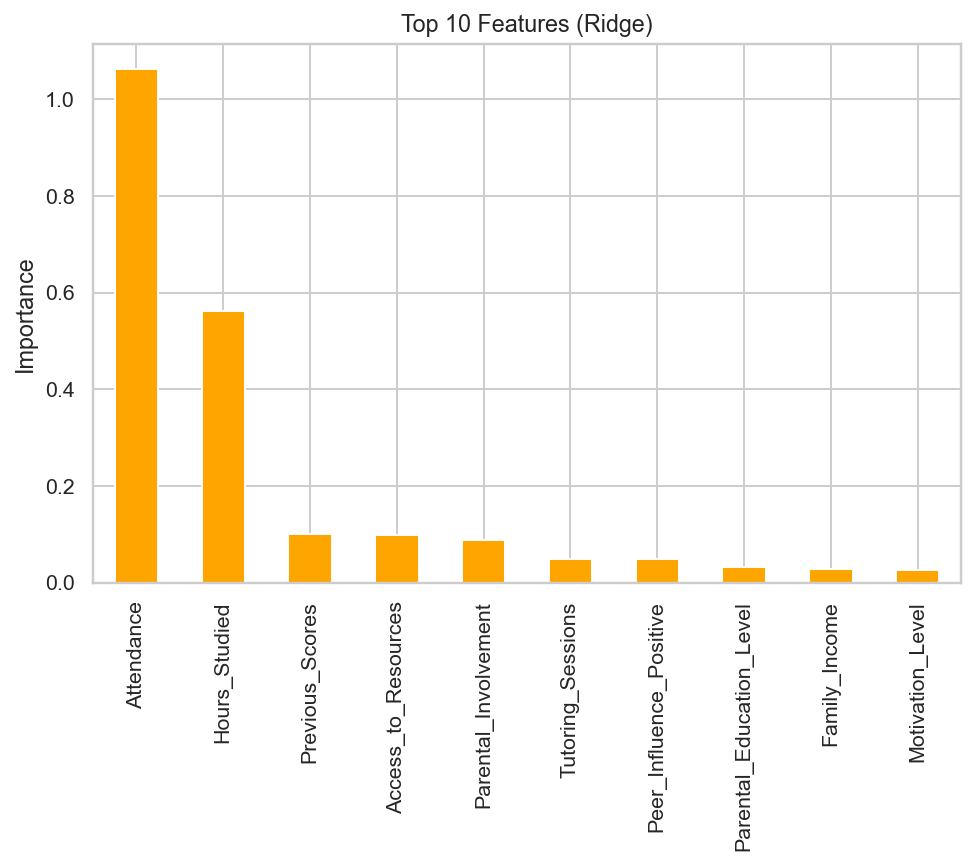

In [1254]:
from sklearn.linear_model import Ridge

# train
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# predict
y_pred_ridge = ridge.predict(X_test)

# evaluate
ridge_results = evaluate_model(y_test, y_pred_ridge, "Ridge")
display(ridge_results.round(3))

# visualize
plot_predictions(y_test, y_pred_ridge, "Ridge")

# permutation importance
perm_ridge = permutation_importance_plot(ridge, X_test, y_test, top_n=10, model_name="Ridge")

### Lasso Regression  
Uses L1 regularization; slightly weaker due to feature shrinkage.  

,Model,MAE,RMSE,R²
0,Lasso,0.277,0.327,0.989


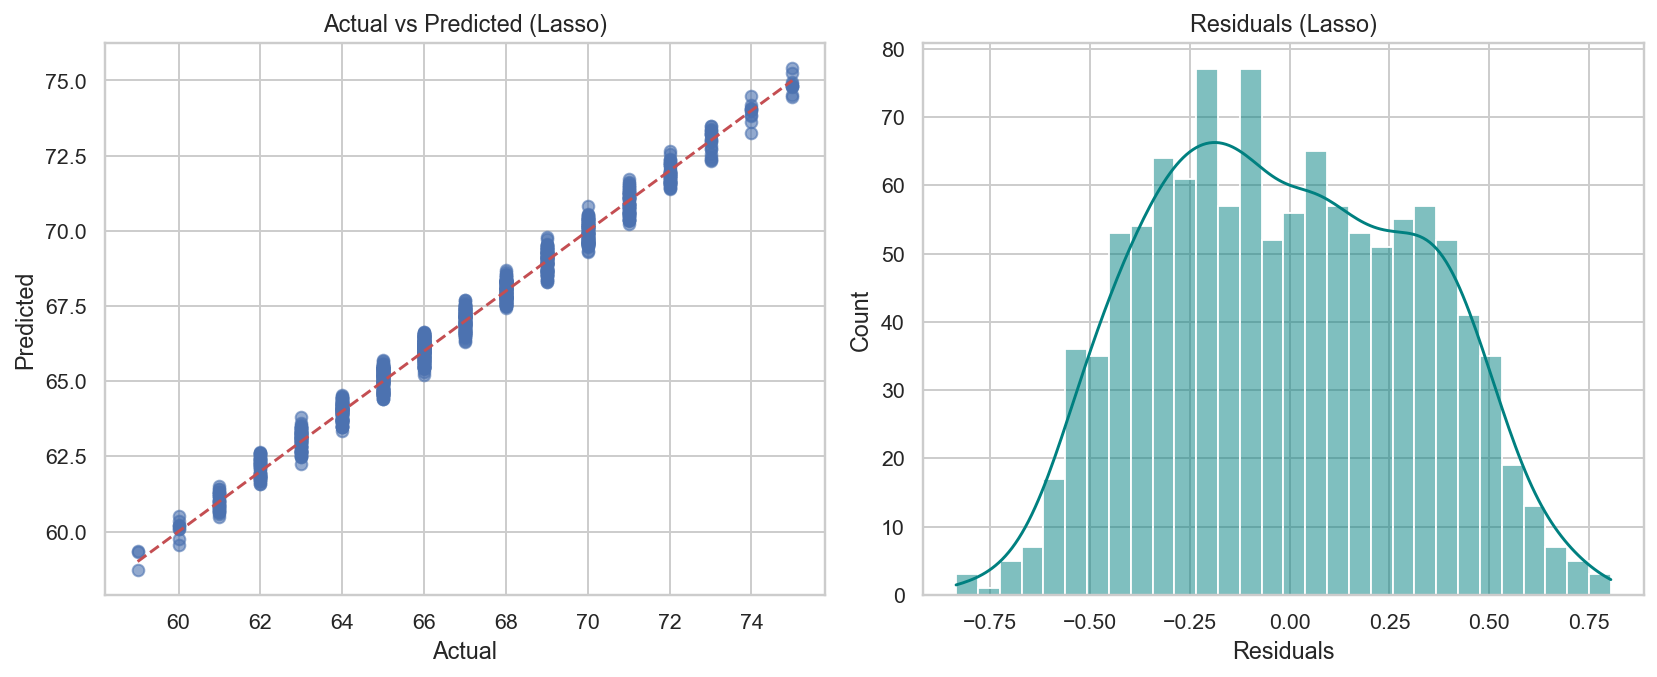

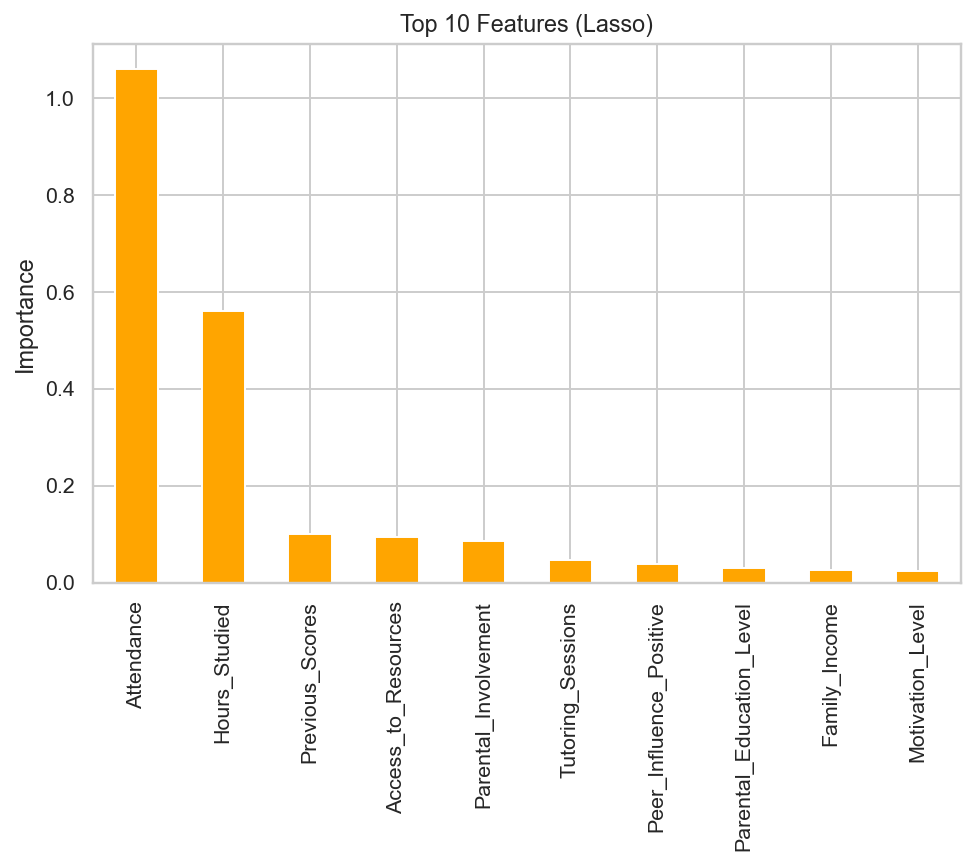

In [1255]:
from sklearn.linear_model import Lasso

# train
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# predict
y_pred_lasso = lasso.predict(X_test)

# evaluate
lasso_results = evaluate_model(y_test, y_pred_lasso, "Lasso")
display(lasso_results.round(3))

# visualize
plot_predictions(y_test, y_pred_lasso, "Lasso")

# permutation importance
perm_lasso = permutation_importance_plot(lasso, X_test, y_test, top_n=10, model_name="Lasso")


### ElasticNet  
Combines L1 & L2 penalties; no gain over simpler models.  

,Model,MAE,RMSE,R²
0,ElasticNet,0.274,0.323,0.99


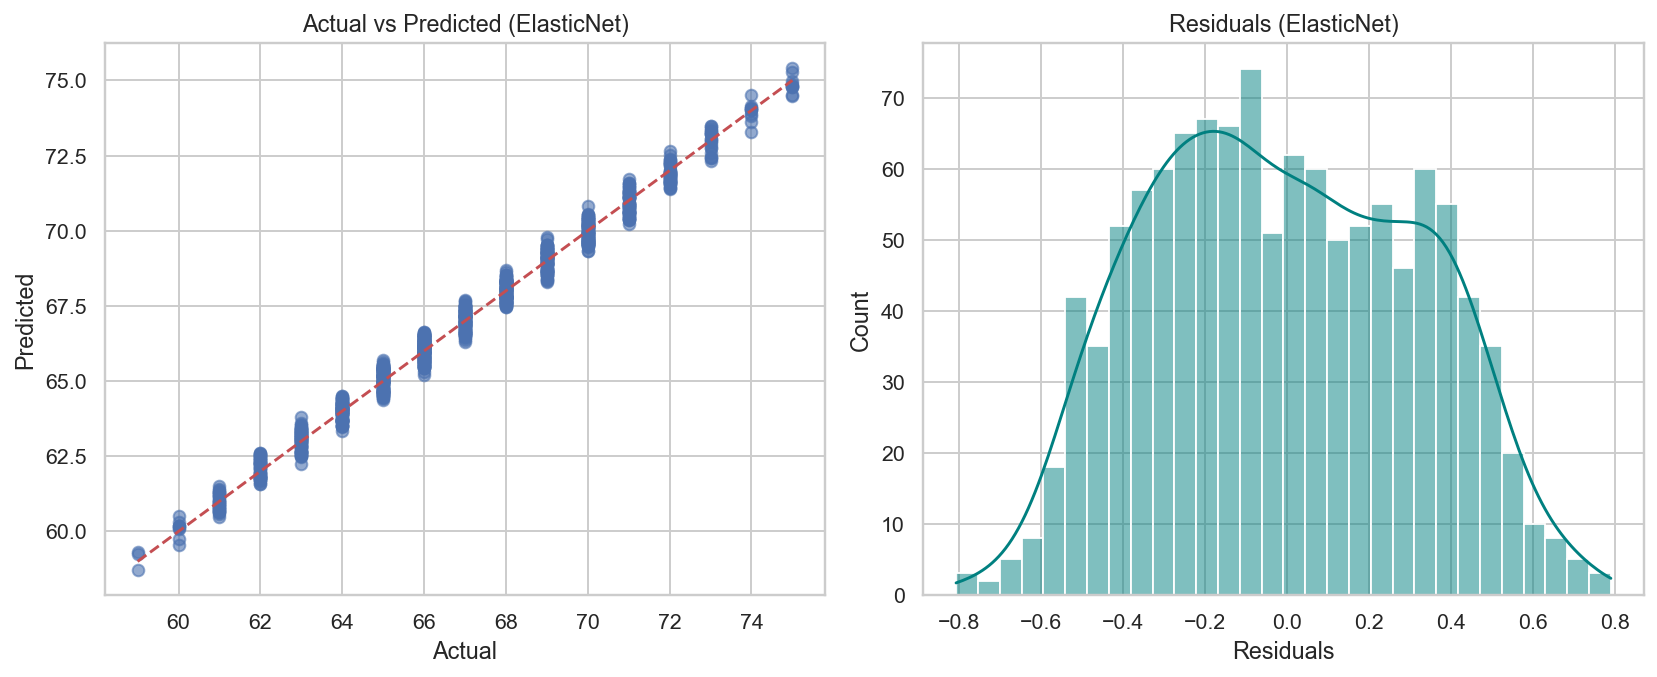

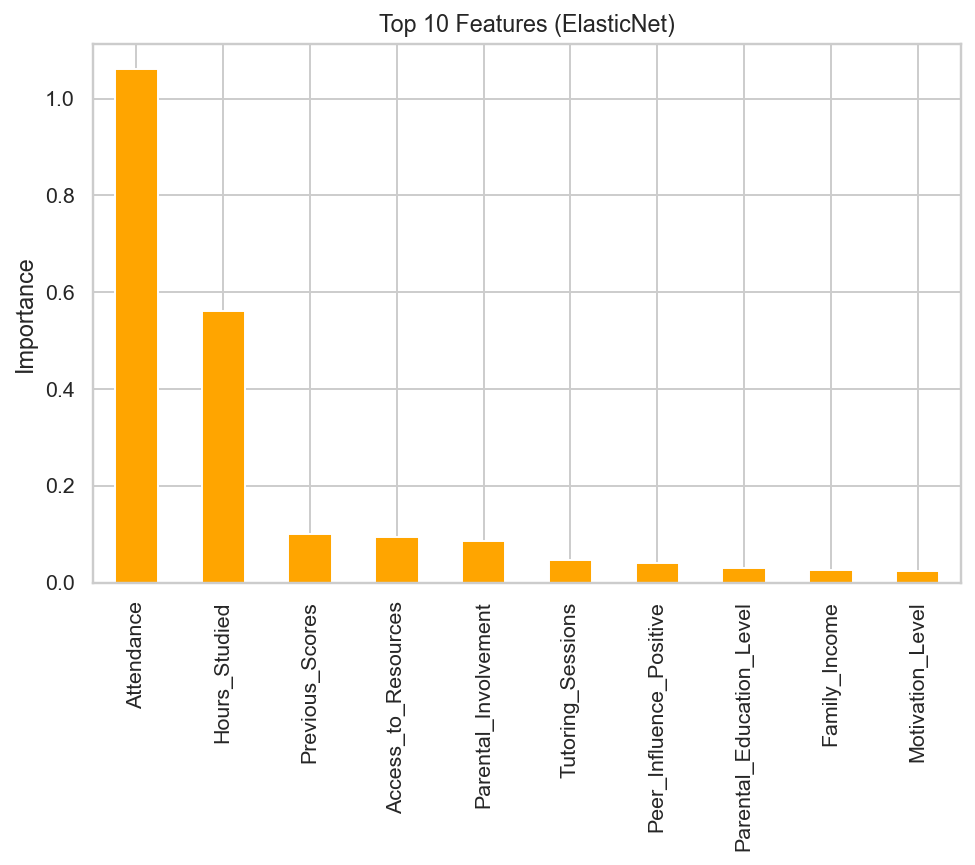

In [1256]:
from sklearn.linear_model import ElasticNet

# train
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic.fit(X_train, y_train)

# predict
y_pred_elastic = elastic.predict(X_test)

# evaluate
elastic_results = evaluate_model(y_test, y_pred_elastic, "ElasticNet")
display(elastic_results.round(3))

# visualize
plot_predictions(y_test, y_pred_elastic, "ElasticNet")

# permutation importance
perm_elastic = permutation_importance_plot(elastic, X_test, y_test, top_n=10, model_name="ElasticNet")


### Polynomial Regression (deg=2)  
Captures non-linear patterns; performance similar, added complexity unnecessary.  

,Model,MAE,RMSE,R²
0,Polynomial,0.269,0.317,0.99


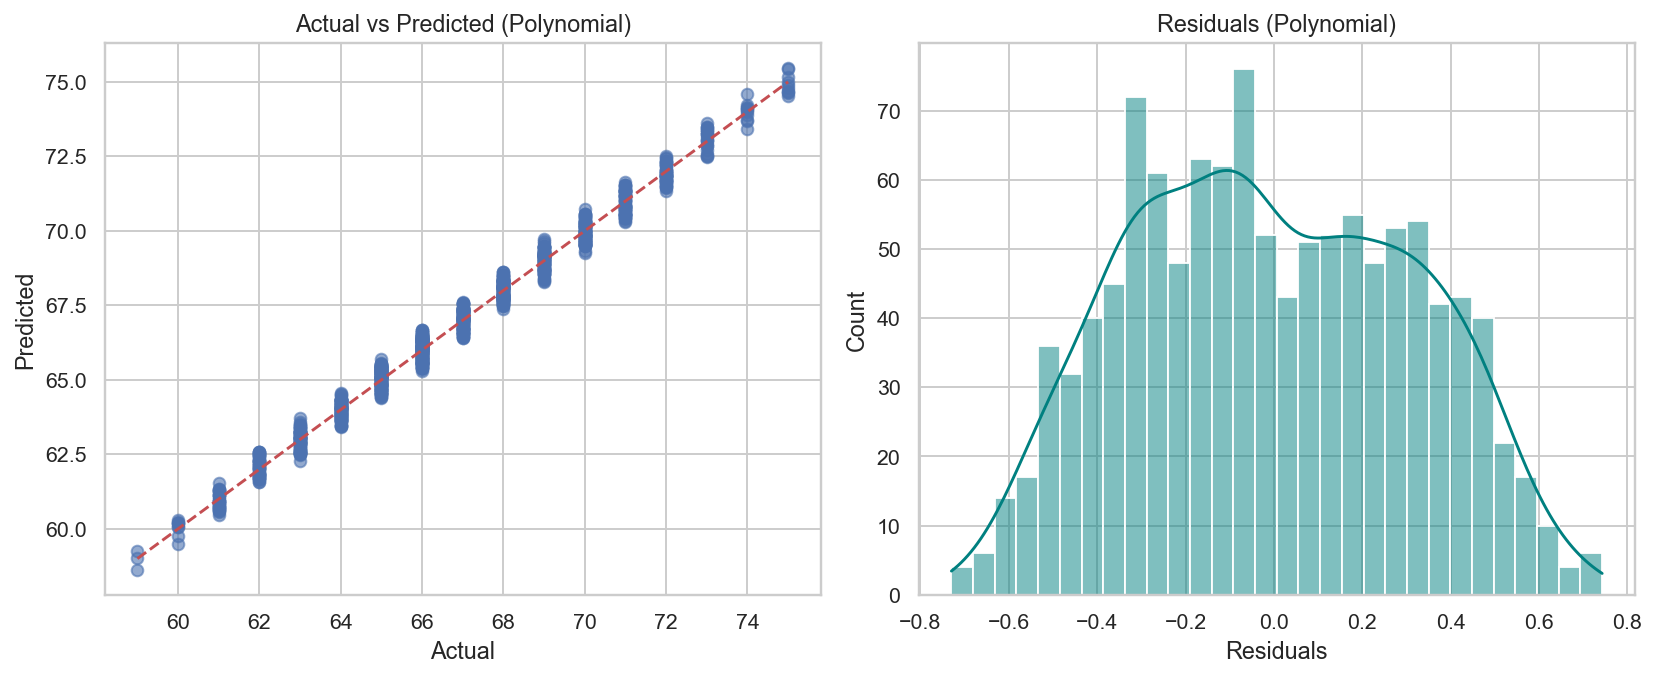

In [1257]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# pipeline
poly_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())
])

# train
poly_model.fit(X_train, y_train)

# predict
y_pred_poly = poly_model.predict(X_test)

# evaluate
poly_results = evaluate_model(y_test, y_pred_poly, "Polynomial")
display(poly_results.round(3))

# visualize
plot_predictions(y_test, y_pred_poly, "Polynomial")

### Random Forest  
Tree-based ensemble; significantly weaker, not suitable for this dataset.  

          Model    MAE   RMSE     R²
0  RandomForest  0.841  1.051  0.889


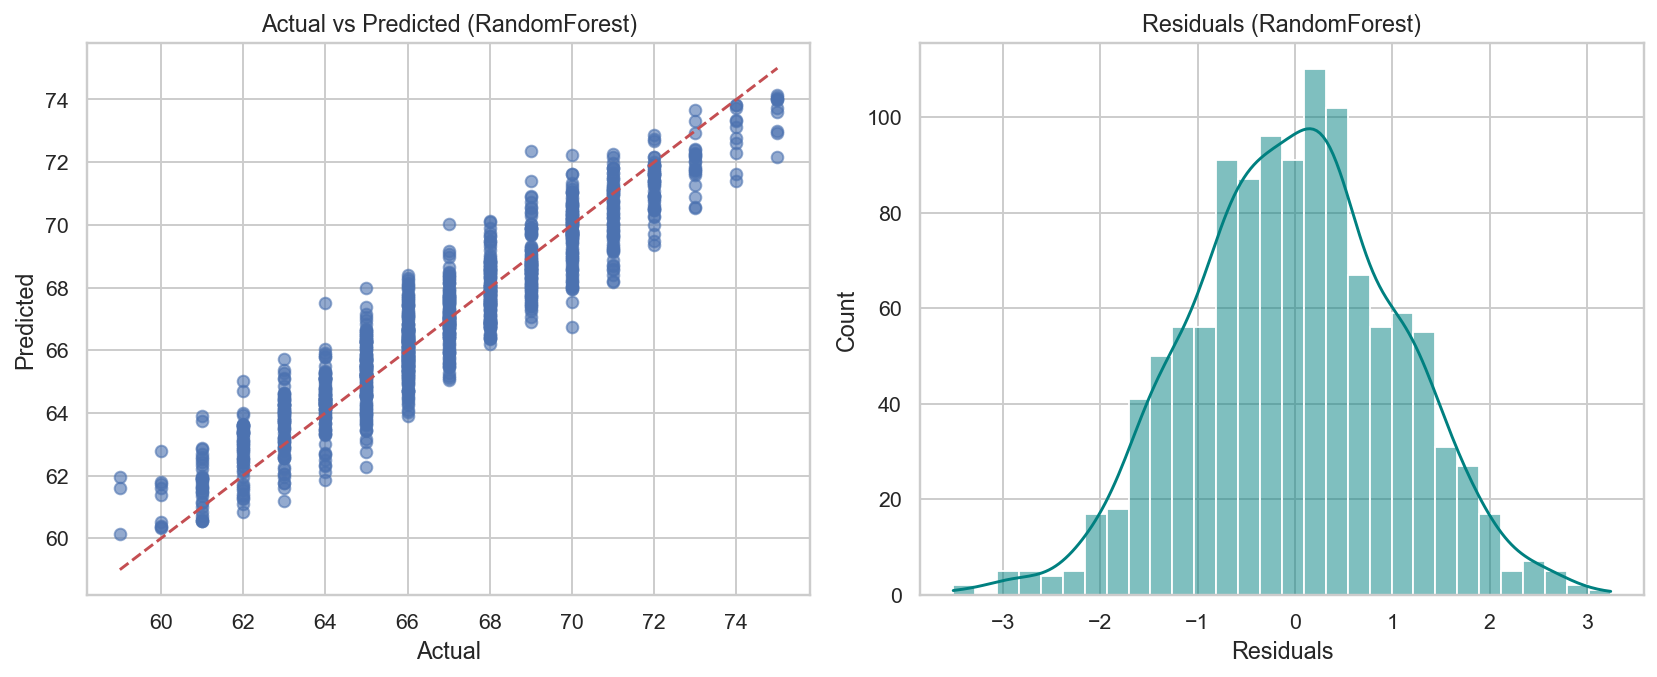

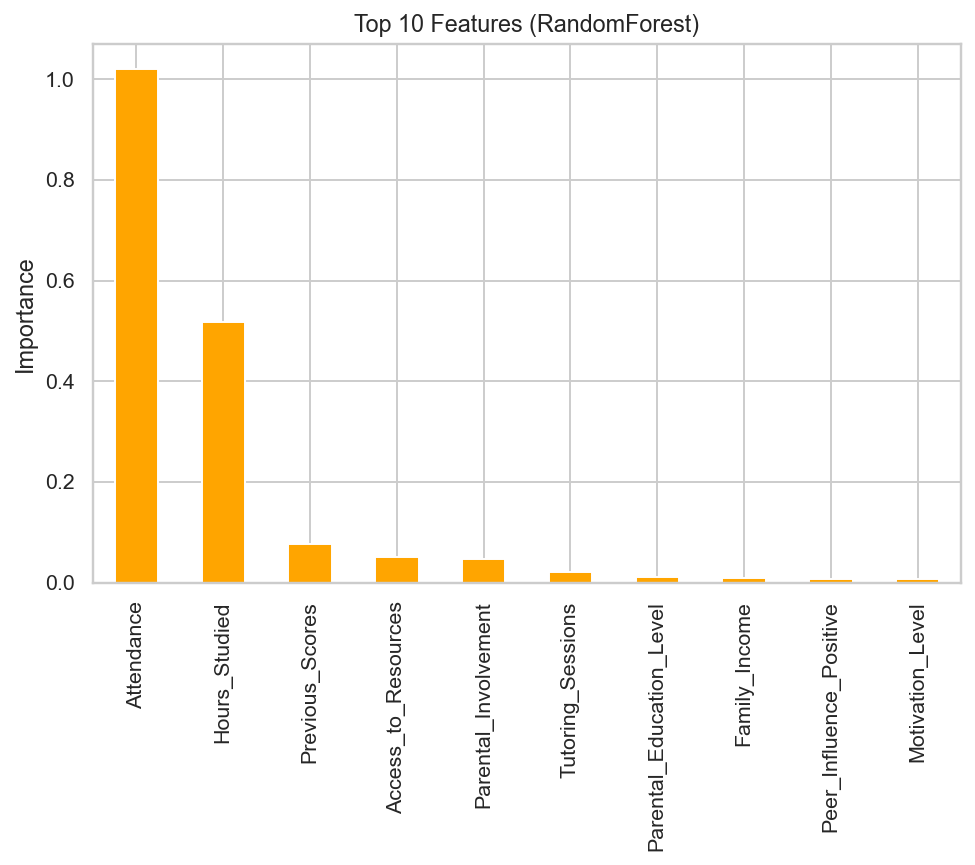

In [1258]:
from sklearn.ensemble import RandomForestRegressor

# train
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# predict
y_pred_rf = rf.predict(X_test)

# evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "RandomForest")
print(rf_results.round(3))

# visualize
plot_predictions(y_test, y_pred_rf, "RandomForest")

# permutation importance
perm_rf = permutation_importance_plot(rf, X_test, y_test, top_n=10, model_name="RandomForest")


### Support Vector Regression (SVR)  
Kernel-based model; reasonable results but worse than linear models. 

  Model    MAE  RMSE    R²
0   SVR  0.355  0.45  0.98


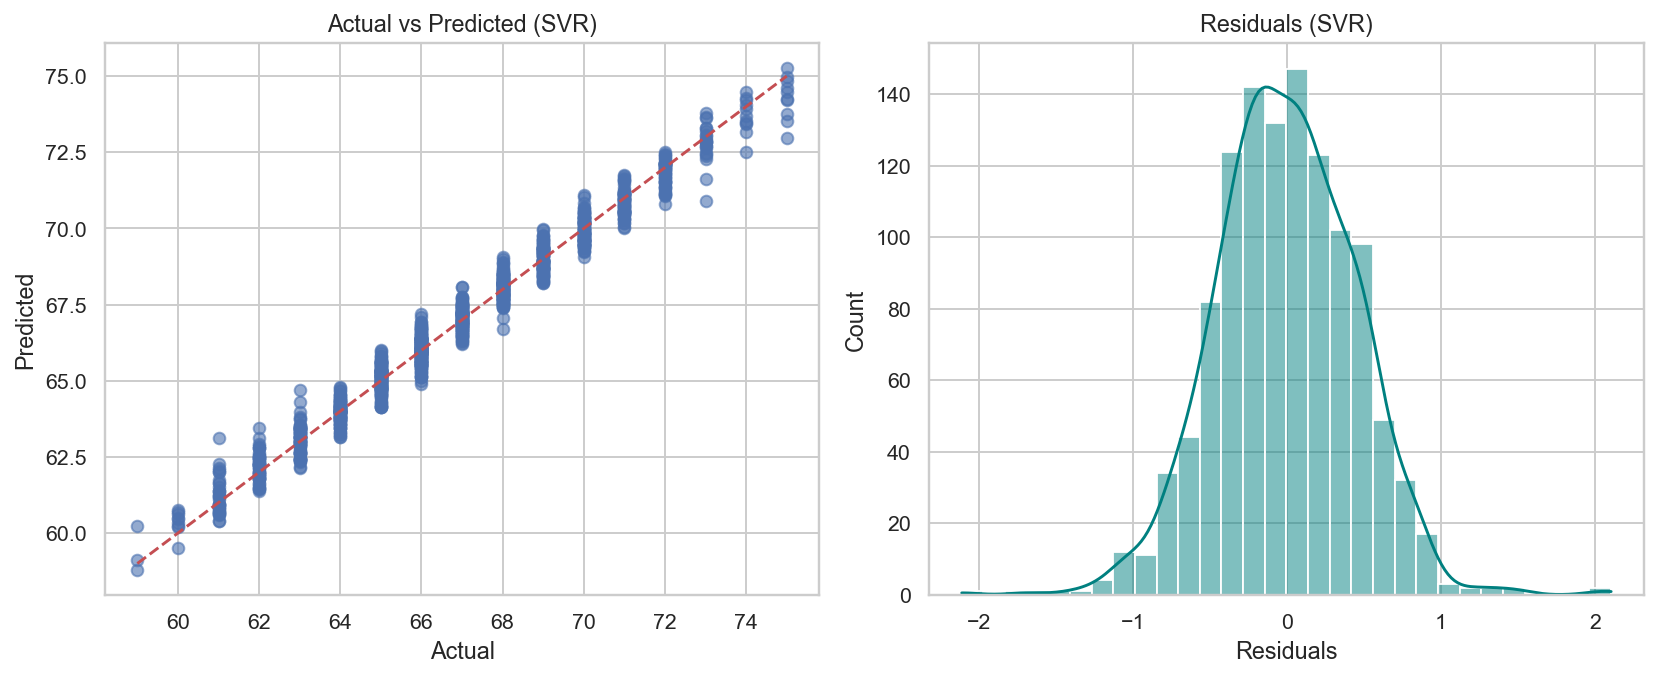

In [1259]:
from sklearn.svm import SVR

# Pipeline
svr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=10, epsilon=0.1))
])

# train
svr_model.fit(X_train, y_train)

# predict
y_pred_svr = svr_model.predict(X_test)

# evaluate
svr_results = evaluate_model(y_test, y_pred_svr, "SVR")
print(svr_results.round(3))

# visualize
plot_predictions(y_test, y_pred_svr, "SVR")

## Model Comparison & Conclusion

| Model          | MAE   | RMSE  |   R² |
|----------------|-------|-------|------|
| Linear         | 0.264 | 0.311 | 0.990 |
| Ridge          | 0.264 | 0.311 | 0.990 |
| Lasso          | 0.277 | 0.327 | 0.989 |
| ElasticNet     | 0.274 | 0.323 | 0.990 |
| Polynomial     | 0.269 | 0.317 | 0.990 |
| SVR            | 0.355 | 0.450 | 0.980 |
| Random Forest  | 0.841 | 1.051 | 0.889 |

- **Best models**: Linear, Ridge, and ElasticNet (all achieved R² ≈ 0.99 with very low errors).  
